# D206 Data Cleaning

***Desiree McElroy***

-------
# A. Research Question
Is there a correlation between specific geographical areas and the frequency of hospital readmissions? By examining various area characteristics such as location, city, state, and zip code, this research aims to identify patterns that may indicate higher susceptibility to repeated hospital visits. Understanding these correlations could offer valuable insights into potential factors influencing readmission rates and guide targeted interventions to improve patient outcomes.

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats
from sklearn.decomposition import PCA

In [2]:
# read in the csv file and create dataframe
df = pd.read_csv('medical_raw_data.csv', index_col=[0])

In [3]:
df.tail(1).T

,10000
CaseOrder,10000
Customer_id,I569847
Interaction,bc482c02-f8c9-4423-99de-3db5e62a18d5
UID,95663a202338000abdf7e09311c2a8a1
City,Coraopolis
State,PA
County,Allegheny
Zip,15108
Lat,40.49998
Lng,-80.19959


# B. Variable Descriptions <a class="anchor" id="second-bullet"></a>


***Describe all variables***

Name | Description | Type | Example
:---: | :---: | :---: | :--:
CaseOrder | Case order number, also serves as an index | qualitative | 10000
Customer_id | Unique ID given to each patient | qualitative | I569847
Interaction | Unique ID given to interaction with patient | qualitative | bc482c02-f8c9-4423-99de-3db5e62a18d5
uid | Unique ID given to interaction with patient | qualitative | 95663a202338000abdf7e09311c2a8a1
city | patient's city per their billing statement | qualitative | Coraopolis
state | patient's state per their billing statement | qualitative | PA
county | patient's county of residence per their billing statement | qualitative | Allegheny
zip | patient's residence zip code per their billing statement | qualitative | 15108
lat | latitude coordinate of patient residence per billing statement | qualitative | 40.49998
lng | longitude coordinate of patient residence per billing statement | qualitative | -80.19959
population | population within a mile radius of patient | quantitative | 41524
area | rural, urban or suburban area type | qualitative | Urban
timezone | timezone of patient's residence | qualitative | America/New_York
job | job of patient (or primary insurance holder) per their admissions information | qualitative | Sports development officer
children | number of children in patient's household | quantitative | 8.0
age | age of patient | quantitative | 53
education | highest earned degree of patient | qualitative | 9th Grade to 12th Grade, No Diploma
employment | ..... | qualitative | full time
income | annual income of patient or primary insurance holder | quantitative | 62682.63
marital | marital status of patient or primary insurance holder | qualitative | Separated
gender | the customer's self identification of gender (male, female or nonbinary) | qualitative | Female
readmis | whether patient was readmitted within a month of last release (yes or no) | qualitative | Yes
vitd_levels | the patient's vitamin d level measured in ng/mL | quantitative | 20.421883
doc_visits | number of times primary physician visited the patient during the initial hospitalization | quantitative | 5
full_meals_eaten | number of full meals a patient ate while hospitalized, where partial meals are rounded to 0 | quantitative | 0
vitd_supp | number of times vit d supplement was given to patient | quantitative | 1
soft_drink | whether patient drinks three or more sodas a day (yes,no) | qualitative | no
initial_admin | how patient was initially admitted into the hospital (emergency admission, elective admission, observation | qualitative | Observation Admission
highblood | whether patient has high blood pressure (yes,no) | qualitative | No
stroke | whether patient has had a stroke (yes,no) | qualitative | No
complication_risk | level of complication risk assessed by physician (high, medium, low) | qualitative | Low
overweight | whether patient is considered overweight based on age, gender and height (yes, no) | qualitative | 1.0
arthritis | whether patient has arthritis (yes, no) | qualitative | Yes
diabetes | whether patient has diabetes (yes, no) | qualitative | No
hyperlipidemia | whether patient has hyperlipidemia (yes, no) | qualitative | Yes
backpain | whether patient has chronic backpain (yes, no) | qualitative | No
anxiety | whether patient has anxiety (yes, no) | qualitative | 0.0
allergic_rhinitis | whether patient has allergic rhinitis (yes, no) | qualitative | Yes
reflux_esophagitis | whether patient has reflux esophagitis (yes, no) | qualitative | No
asthma | whether patient has asthma (yes, no) | qualitative | No
services | primary service patient has received while hospitalized (blood work, intravenous, CT scan, MRI) | qualitative | Blood Work
initial_days | number of days patient stayed in the hospital during initial visit | quantitative | 70.850592
totalcharge | The amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized This amount reflects the typical charges billed to patient not including specialized treatments | quantitative | 8700.856021
additional_charges | average amount charge to patient for misc procedures, treatments, medications, anesthesiology | quantitative | 11643.18993
Item1 | Timely admission | qualitative | 4
Item2 | Timely treatment | qualitative | 3
Item3 | represents timely visits | qualitative | 3
Item4 | represents reliability | qualitative | 2
Item5 | represents options | qualitative | 3
Item6 | represents hours of treatment | quantitative | 6
Item7 | represents courteous staff | qualitative | 4
Item8 | represents evidence of active listening from doctor | qualitative | 3

-------

# C1.  Data Cleaning Plan

**Propose a plan that includes the relevant techniques and specific steps needed to assess the quality of the data in the data set.**


a. Get dataframe information summary using info function.

b. Get an idea of the column data types using dtypes function in order to assess whether any data types need to be changed and how to visualize them.

c. Visualize the distribution for continuous data, get an idea of value counts, or run .describe() on column. This will help me assess the type of distribution if any and how to address any empty and anamolous values. This will also help assess whether certain data points are truly anomalous.

c. Analyze the null values, look for any commonality between nulls and assess how to handle them whether it be via imputation, dropping them, or separating them from the dataframe.

d. View the outliers as needed, assess how to handle them, decide whether they are in reasonable bounds or not.

e. Address any duplicates if present.

f. Conduct principal component analysis to uncover any excessive variables and explore relationships.

g. Lastly, address any duplicates if any.

# C2: Justify Data Cleaning Plan
- This is thorough scope of analyzing the data. I start by getting a quick scope of the data by usinf the .info() function which allows me see the names of all columns, their data types, how many missing values are in each function as well as the dataframe shape.
- Next, going column by column allows me to assess the data individually. For example with continuous value columns, I am able to assess the distribution and value counts where necessary. With discrete data, I am able to get a general view of frequency count.
- Analyzing the nulls in each column with missing values allows me to assess any patterns in the missing data and decide how to handle the nulls.

# C3: Justify Programming Languages/Packages
- **Python** is a powerful data science programming language that not only provides ease of use but is also extremely robust in implementing the entire data science pipeline on various types if data including tabular, text and even images.
- Since our data is all maintained in a dataframe, **pandas** and **numpy** are the obvious first choice libraries to assess and clean this data. Numpy is a powerful python library that has many manipulation techniques particularly for arrays such as this dataframe. Pandas is a powerful library specifically for tabular data just like this dataframe. It allows to exploration and manipulation of columns, rows, data types, mathematical analysis etc...
- Visuals also provide a powerful analysis of tabular data and thus **matplotlib** and **seaborn** are the top two choices for visuals. Each provide strong visualization graphs to help easily assess data quality, distribution and general data relationships. The most helpful functions for our particularly data are bar charts, distribution charts, and box plots.
- For PCA, we will use the PCA functions from the **sklearn** library. These are needed to ultimately obtain the eigenvalues and implement with a scree plot to correctly identify linear relationships between some continuous columns from the dataframe.

# C4: Code to assess data quality

In [4]:
# get info on column names, data types, count and nulls.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Educ

In [5]:
print('My dataframe has ', df.shape[0], 'rows and ', df.shape[1], 'columns')

My dataframe has  10000 rows and  52 columns


In [6]:
# lowercase all column names for ease of use
df.columns = map(str.lower, df.columns)

In [7]:
# look at data types
df.dtypes

caseorder               int64
customer_id            object
interaction            object
uid                    object
city                   object
state                  object
county                 object
zip                     int64
lat                   float64
lng                   float64
population              int64
area                   object
timezone               object
job                    object
children              float64
age                   float64
education              object
employment             object
income                float64
marital                object
gender                 object
readmis                object
vitd_levels           float64
doc_visits              int64
full_meals_eaten        int64
vitd_supp               int64
soft_drink             object
initial_admin          object
highblood              object
stroke                 object
complication_risk      object
overweight            float64
arthritis              object
diabetes  

## Columns

### Caseorder

In [8]:
# look at caseorder column, verify unique values, there should be 10,000
df.caseorder.nunique()

10000

### Customer_id

In [9]:
# look at customer_id, verify unique count of values, should be 10,000
df.customer_id.nunique()

10000

### Interaction

In [10]:
# verify interaction has 10,000 unique count of values
df.interaction.nunique()

10000

### Uid

In [11]:
# verify uid has unique count of values, 10,000
df.uid.nunique()

10000

### City

In [12]:
# assess value counts of city column
df.city.value_counts()

Houston          36
San Antonio      26
Springfield      22
New York         21
Miami            21
                 ..
Swink             1
Skippack          1
Fort Irwin        1
Kaunakakai        1
Maple Springs     1
Name: city, Length: 6072, dtype: int64

### State

In [19]:
# assess value counts of state column, verify suitable for categorical
print('Data type is:', df.state.dtypes)
print('Amount of unique entries:', df.state.value_counts().count())
df.state.value_counts()

Data type is: object
Amount of unique entries: 52


TX    553
CA    550
PA    547
NY    514
IL    442
OH    383
MO    328
FL    304
VA    287
IA    276
MI    273
MN    267
NC    254
GA    247
KS    220
WI    214
KY    210
OK    207
WV    207
IN    195
TN    194
AL    194
WA    191
AR    190
NE    185
CO    179
NJ    176
LA    173
MA    149
MS    134
MD    131
SC    128
SD    123
ME    122
OR    122
MT    112
NM    110
ID    109
AZ    108
ND    108
CT     80
NH     79
UT     72
AK     70
VT     60
NV     51
WY     51
PR     43
HI     34
DE     17
RI     14
DC     13
Name: state, dtype: int64

### County

In [20]:
# assess value counts of county column
# variable is suitable as categorical
print(df.county.dtypes)
print('------')
df.county.value_counts()

object
------


Jefferson       118
Washington      100
Franklin         93
Los Angeles      88
Montgomery       80
               ... 
Archer            1
Posey             1
Coal              1
Woodson           1
Throckmorton      1
Name: county, Length: 1607, dtype: int64

### Zip

In [21]:
# some zip codes are missing numbers
df.zip.tail()

9996     27563
9997      8340
9998     37171
9999     57775
10000    15108
Name: zip, dtype: int64

In [22]:
# assess zip codes missing numbers
for i in range(1000):
    if len(str(df.zip.tolist()[i]))<5:
        print(df.zip.tolist()[i])

2584
5043
2468
2138
3464
8332
7935
7882
3462
4408
4940
2889
3885
2835
3220
4344
669
7030
4449
7630
6119
3446
4926
4344
2364
6401
8876
6263
4626
7028
6498
6264
8004
2838
4530
1832
7716
7460
1940
7055
4988
1562
6375
3227
7311
2745
7857
8098
2072
3830
3864
8858
7935
4847
6033
2341
7410
5660
6281
8023
6498
4347
3870
3745
8201
5252
4765
4669
3079
7014
694
5149
8270
5821
751
4928
8317
2452


### Area

object
Rural       3369
Suburban    3328
Urban       3303
Name: area, dtype: int64
------------


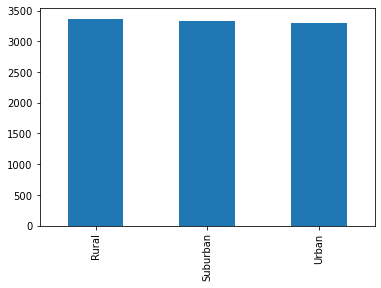

In [23]:
# assess value counts of area column, we can see each is represented fairly
print(df.area.dtypes)
print(df.area.value_counts())
print('------------')
df.area.value_counts().plot(kind='bar')
plt.show()

### Timezone

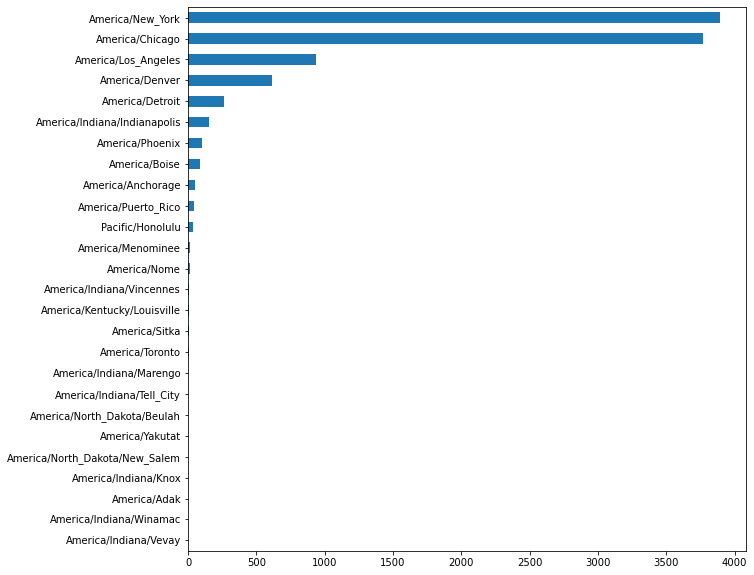

In [25]:
# view list of different time zones
plt.figure(figsize=(10,10))
df.timezone.value_counts().sort_values().plot(kind='barh')
plt.show()

### Children

In [28]:
# gather stats on data, datatype makes more sense as int
print('Data type is:', df.children.dtypes)
df.children.describe()

Data type is: float64


count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: children, dtype: float64

### Age

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: age, dtype: float64
--------


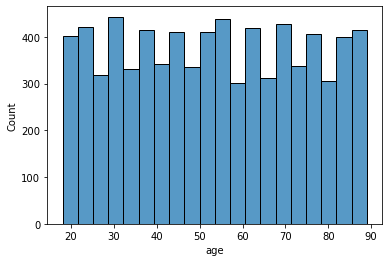

In [27]:
# data exists within reasonable bounds, data type should be int
print(df.age.describe())
print('--------')
# data is uniformly distributed
sns.histplot(data=df, x='age')
plt.show()

### Education

object


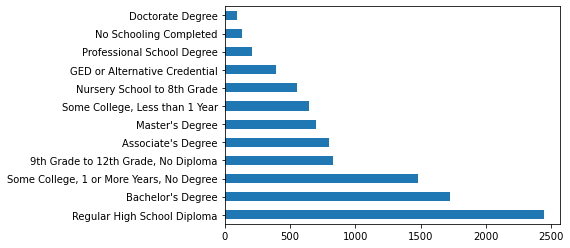

In [29]:
# visualize data and type, suitable for categorical
print(df.education.dtypes)
df.education.value_counts().plot(kind='barh')
plt.show()

### Employment

object


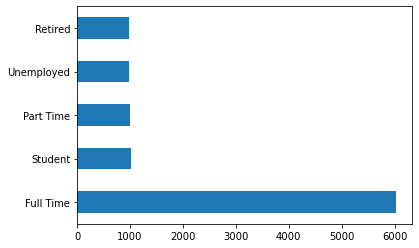

In [32]:
# visualize distribution and data typem suitable for categorical
print(df.employment.dtypes)
df.employment.value_counts().plot(kind='barh')
plt.show()

### Income

In [33]:
# some data doesnt seem to exist within reasonable bounds, possible outliers
df.income.describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: income, dtype: float64

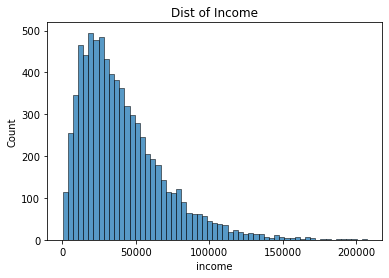

In [34]:
plt.title('Dist of Income')
sns.histplot(df.income)
plt.show()

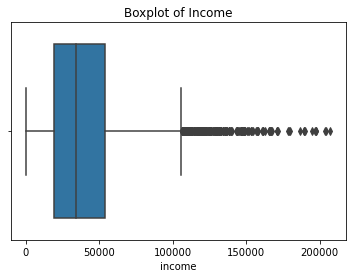

<Figure size 1152x648 with 0 Axes>

In [35]:
# visualizing outliers in income
plt.title('Boxplot of Income')
sns.boxplot(df.income)
plt.figure(figsize=(16,9))
plt.show()

In [36]:
# taking a look at some obvious low income outliers, 
# could be from error when entered or these values may very well be possible
df.income.nsmallest(10)

822     154.08
9809    300.79
288     395.23
111     401.86
8659    493.04
9129    695.22
5894    702.16
1216    826.01
6300    881.07
1035    881.40
Name: income, dtype: float64

Based on this visualization and quick assessment, the lower end values could be assumed outliers but are still within two standard deviations of the mean and are not technically anomalous.

### Marital

Data type is: object


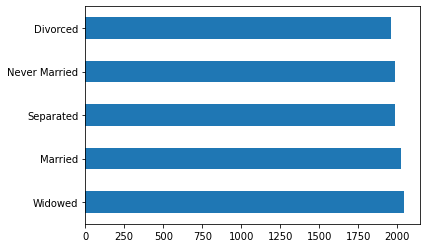

In [38]:
# data is also uniformly distributed, suitable for categorical dtype
print('Data type is:', df.marital.dtypes)
df.marital.value_counts().plot(kind='barh')
plt.show()

### Gender

In [39]:
# dtype currently object but can be categorical
print('Data type is:', df.gender.dtypes)
df.gender.value_counts()

Data type is: object


Female                  5018
Male                    4768
Prefer not to answer     214
Name: gender, dtype: int64

### Readmis

In [40]:
# dtype may be categorical or boolean
df.readmis.value_counts()

No     6331
Yes    3669
Name: readmis, dtype: int64

### Vit D Levels

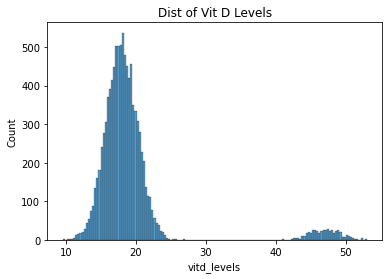

---------
count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: vitd_levels, dtype: float64
---------


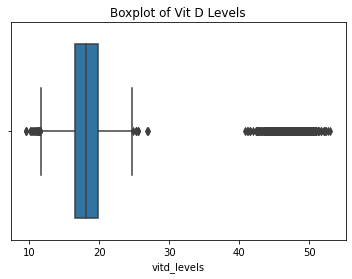

In [41]:
# visualize dist of vit d levels, assert dtype can remain float
sns.histplot(data=df, x='vitd_levels')
plt.title('Dist of Vit D Levels')
plt.show()
print('---------')

# assess descripion of data
print(df.vitd_levels.describe())
print('---------')

# assess outliers
plt.title('Boxplot of Vit D Levels')
sns.boxplot(df.vitd_levels)
# plt.figure(figsize=(16,9))
plt.show()

We arguably have a right skewed or bimodal distribution. Despite most values around 30 or above are shown as outliers, they have a steady normal distribution and thus there is no reason to remove these values. Further investigation is needed before separating these values.

### Doc_visits

In [42]:
# view data details, suitable as float or int
df.doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: doc_visits, dtype: float64

In [45]:
# verify suitable as int
print('Data type is:', df.doc_visits.dtypes)
df.doc_visits.value_counts()

Data type is: int64


5    3823
6    2436
4    2385
7     634
3     595
8      61
2      58
1       6
9       2
Name: doc_visits, dtype: int64

### full_meals_eaten

Data type is: int64
-----
count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: full_meals_eaten, dtype: float64
-------


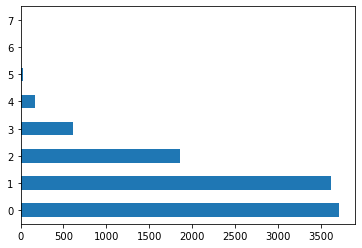

In [47]:
# assess distribution of meals eaten, verify suitable as int
print('Data type is:', df.full_meals_eaten.dtypes)
print('-----')
print(df.full_meals_eaten.describe())
print('-------')
df.full_meals_eaten.value_counts().plot(kind='barh')
plt.show()

### vitd_supp

Data type is: int64


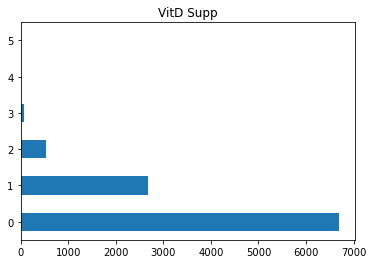

In [48]:
# assess value counts of Vitd supp, verify suitable as int
print('Data type is:', df.vitd_supp.dtypes)
df.vitd_supp.value_counts().plot(kind='barh')
plt.title('VitD Supp')
plt.show()

### soft_drink

In [49]:
# suitable dtype as bool
print('Data type is:', df.soft_drink.dtypes)
df.soft_drink.value_counts()

Data type is: object


No     5589
Yes    1944
Name: soft_drink, dtype: int64

### initial_admin

In [50]:
# verify data suitable as categorical
print('Data type is:', df.initial_admin.dtypes)
df.initial_admin.value_counts()

Data type is: object


Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: initial_admin, dtype: int64

### highblood

In [51]:
# verify data suitable as bool
print('Data type is:', df.highblood.dtypes)
df.highblood.value_counts()

Data type is: object


No     5910
Yes    4090
Name: highblood, dtype: int64

### stroke

In [52]:
# verify data suitable as bool
print('Data type is:', df.stroke.dtypes)
df.stroke.value_counts()

Data type is: object


No     8007
Yes    1993
Name: stroke, dtype: int64

### complication_risk

In [53]:
# verify data suitable as categorical
print('Data type is:', df.complication_risk.dtypes)
df.complication_risk.value_counts()

Data type is: object


Medium    4517
High      3358
Low       2125
Name: complication_risk, dtype: int64

### overweight

In [54]:
# verify data suitable as bool
print('Data type is:', df.overweight.dtypes)
df.overweight.value_counts()

Data type is: float64


1.0    6395
0.0    2623
Name: overweight, dtype: int64

### arthritis

In [55]:
# verify data suitable as bool
print('Data type is:', df.arthritis.dtypes)
df.arthritis.value_counts()

Data type is: object


No     6426
Yes    3574
Name: arthritis, dtype: int64

### diabetes

In [56]:
# verify data suitable as bool
print('Data type is:', df.diabetes.dtypes)
df.diabetes.value_counts()

Data type is: object


No     7262
Yes    2738
Name: diabetes, dtype: int64

### hyperlipidemia

In [57]:
# verify data suitable as bool
print('Data type is:', df.hyperlipidemia.dtypes)
df.hyperlipidemia.value_counts()

Data type is: object


No     6628
Yes    3372
Name: hyperlipidemia, dtype: int64

### backpain

In [58]:
# verify data suitable as bool
print('Data type is:', df.backpain.dtypes)
df.backpain.value_counts()

Data type is: object


No     5886
Yes    4114
Name: backpain, dtype: int64

### anxiety

In [59]:
# verify data suitable as bool
print('Data type is:', df.anxiety.dtypes)
df.anxiety.value_counts()

Data type is: float64


0.0    6110
1.0    2906
Name: anxiety, dtype: int64

### allergic_rhinitis

In [60]:
# verify data suitable as bool
print('Data type is:', df.allergic_rhinitis.dtypes)
df.allergic_rhinitis.value_counts()

Data type is: object


No     6059
Yes    3941
Name: allergic_rhinitis, dtype: int64

### asthma

In [61]:
# verify data suitable as bool
print('Data type is:', df.asthma.dtypes)
df.asthma.value_counts()

Data type is: object


No     7107
Yes    2893
Name: asthma, dtype: int64

### services

In [62]:
# verify data suitable as categorical
print('Data type is:', df.services.dtypes)
df.services.value_counts()

Data type is: object


Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: services, dtype: int64

### initial_days

Data type is: float64


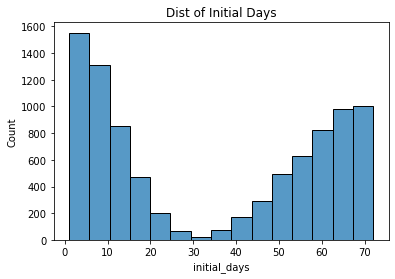

------


count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: initial_days, dtype: float64

In [63]:
# visualize distribution, verify data suitable as int
print('Data type is:', df.initial_days.dtypes)
sns.histplot(data=df, x='initial_days')
plt.title('Dist of Initial Days')
plt.show()
print('------')
df.initial_days.describe()

### totalcharge

Data type is: float64


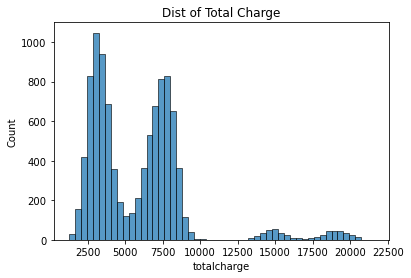

------
count    10000.000000
mean      5891.538261
std       3377.558136
min       1256.751699
25%       3253.239465
50%       5852.250564
75%       7614.989701
max      21524.224210
Name: totalcharge, dtype: float64
-----


In [64]:
# verify data suitable as float
# amounts are within reasonable bounds
print('Data type is:', df.totalcharge.dtypes)
sns.histplot(data=df, x='totalcharge')
plt.title('Dist of Total Charge')
plt.show()
print('------')
#verify data is within reasonable bounds
print(df.totalcharge.describe())
print('-----')

### additional_charges

Data type is: float64


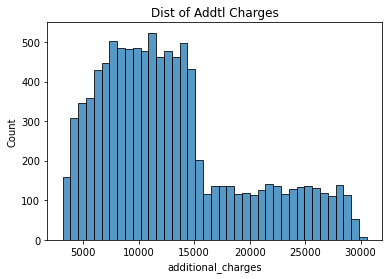

count    10000.000000
mean     12934.528586
std       6542.601544
min       3125.702716
25%       7986.487642
50%      11573.979365
75%      15626.491032
max      30566.073130
Name: additional_charges, dtype: float64


In [65]:
# verify data suitable as float
# amounts are within reasonable bounds
print('Data type is:', df.additional_charges.dtypes)
sns.histplot(data=df, x='additional_charges')
plt.title('Dist of Addtl Charges')
plt.show()

print(df.additional_charges.describe())

### item1

In [66]:
# verify data only consists of 1-8 options, dtype suitable for categorical
print('Data type is:', df.item1.dtypes)
df.item1.value_counts()

Data type is: int64


4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: item1, dtype: int64

### item2

In [67]:
# verify data only consists of 1-8 options, dtype suitable for categorical
print('Data type is:', df.item2.dtypes)
df.item2.value_counts()

Data type is: int64


3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: item2, dtype: int64

### item3

In [68]:
# verify data only consists of 1-8 options, dtype suitable for categorical
print('Data type is:', df.item3.dtypes)
df.item3.value_counts()

Data type is: int64


4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: item3, dtype: int64

### item4

In [69]:
# verify data only consists of 1-8 options, dtype suitable for categorical
print('Data type is:', df.item4.dtypes)
df.item4.value_counts()

Data type is: int64


3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: item4, dtype: int64

### item5

In [70]:
# verify data only consists of 1-8 options, dtype suitable for categorical
print('Data type is:', df.item5.dtypes)
df.item5.value_counts()

Data type is: int64


4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: item5, dtype: int64

### item6

In [71]:
# verify data only consists of 1-8 options, dtype suitable for categorical
print('Data type is:', df.item6.dtypes)
df.item6.value_counts()

Data type is: int64


4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: item6, dtype: int64

### item7

In [72]:
# verify data only consists of 1-8 options, dtype suitable for categorical
print('Data type is:', df.item7.dtypes)
df.item7.value_counts()

Data type is: int64


4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: item7, dtype: int64

### item8

In [73]:
# verify data only consists of 1-8 options, dtype suitable for categorical
print('Data type is:', df.item8.dtypes)
df.item8.value_counts()

Data type is: int64


3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: item8, dtype: int64

-----
**Analyzing Nulls**

In [74]:
# get a general print out of null values
df.isnull().sum()

caseorder                0
customer_id              0
interaction              0
uid                      0
city                     0
state                    0
county                   0
zip                      0
lat                      0
lng                      0
population               0
area                     0
timezone                 0
job                      0
children              2588
age                   2414
education                0
employment               0
income                2464
marital                  0
gender                   0
readmis                  0
vitd_levels              0
doc_visits               0
full_meals_eaten         0
vitd_supp                0
soft_drink            2467
initial_admin            0
highblood                0
stroke                   0
complication_risk        0
overweight             982
arthritis                0
diabetes                 0
hyperlipidemia           0
backpain                 0
anxiety                984
a

In [75]:
# get list of columns with null values
null_cols = df.columns[df.isna().any()].tolist()
null_cols

df[null_cols].head()

,children,age,income,soft_drink,overweight,anxiety,initial_days
1,1.0,53.0,86575.93,NaN,0.0,1.0,10.585770
2,3.0,51.0,46805.99,No,1.0,NaN,15.129562
3,3.0,53.0,14370.14,No,1.0,NaN,4.772177
4,0.0,78.0,39741.49,No,0.0,NaN,1.714879
5,NaN,22.0,1209.56,Yes,0.0,0.0,1.254807


In [76]:
for col in null_cols:
    print('Total percentage of null values for', col, '--->', df[col].isna().sum()/len(df[col])*100)

Total percentage of null values for children ---> 25.88
Total percentage of null values for age ---> 24.14
Total percentage of null values for income ---> 24.64
Total percentage of null values for soft_drink ---> 24.67
Total percentage of null values for overweight ---> 9.82
Total percentage of null values for anxiety ---> 9.84
Total percentage of null values for initial_days ---> 10.56


The children, age, income and soft_drink column have almost 25% of null values while overweight, anxiety and initial_days column are only missing roughly 10%. In any case, all columns have more than 5% missing values and thus we cannot simply drop them. The next step is to analyze the distributions where necessary and choose a valid imputation method.

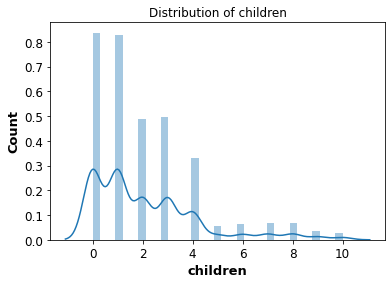

----------------------------------------------------


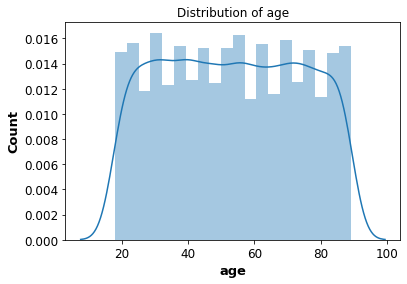

----------------------------------------------------


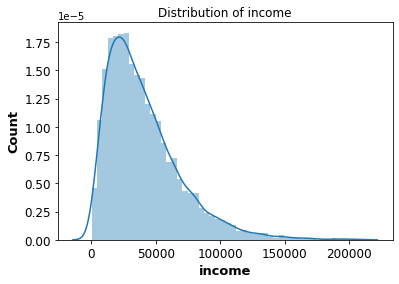

----------------------------------------------------


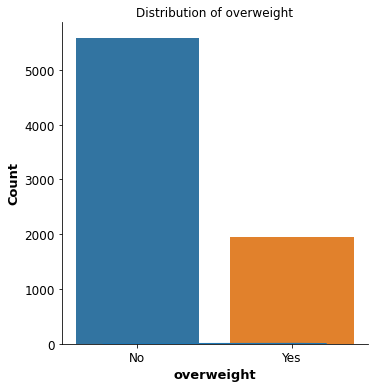

----------------------------------------------------


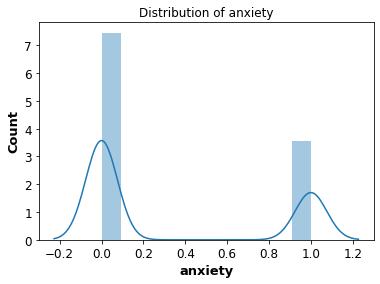

----------------------------------------------------


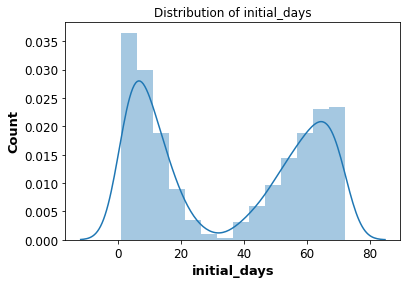

----------------------------------------------------


In [77]:
# analyze distribution of null columns
for i in df[null_cols]:
        if df[i].dtypes == 'object':
            sns.catplot(data=df, x=i, kind='count')
            
        else:
            sns.distplot(df[i])
            plt.xticks(fontsize= 12)
            plt.yticks(fontsize=12)
            plt.ylabel("Count", fontsize= 13, fontweight="bold")
            plt.xlabel(i, fontsize=13, fontweight="bold")
            plt.title('Distribution of '+i)
            plt.show()
            print('----------------------------------------------------')

***Null Column Takeaways:***
\
Null columns type of distribution and imputation:\
    - **Children:** We are working with discrete data points and thus the best method of imputation for this column is using the mode.\
    - **Age:** Uniform Distribution, I want to go ahead impute with the mean since the data is symmetric\
    - **Income:** We have a skewed distribution and thus the best method for this would be using the median.\
    - **Overweight:** Working with categorical data it is best to use the mode.\
    - **Anxiety:** Again working with categorical data it is best to use the mode.\
    - **Initial_Days:** Here we have a bimodal distribution and thus the best recommendation is to use mode or median. Since our data points for this column are floats, I will use the median.


In [78]:
# analyze duplicates, there are no duplicates
df.duplicated().any()

False

# D1: Describe Data Quality Findings

**Zip**: This column had numerous entries that were not 5 digit zip codes. Analysis found some zip codes were missing 1 or more numbers. There is no way of knowing which numbers are missing. If we guess some 0s were stripped in the beginning since they were stored as integers, we would have to assume the zip codes with missing numbers lost the first or two digits because they were 0s and thus we can address this.

**Population**: This column entered as a float and can be changed to int.

**Timezone**: This column is not organized and condensed to the standard US time zones and thus I will change this to standard time zones. 

**Children**: This column is unnecessarily stored as a float and thus can be changed to int. This column also has 25% of values missing. The distribution is skewed right and there may be a pattern in higher ages not being entered.

**Age**: This column is also unnecessarily stores as a float and thus will be changed to int. This column is also missing 25% of the data. Since it is a uniformed distribution it is best to impute missing values with the mean.

**Income**: Again, this column is also unnecessarily stores as a float and thus will be changed to int. This column is also missing 25% of values and will be imputed using the median.

**Marital**: This column is entered as string but should be changed to cateogrical.

**Gender**: This column is entered as string but should be changed to cateogrical. According to the data dictionary, gender should have three options, female, male and nonbinary. In the dataframe the three options are female, male and prefer not to answer. Generally we cannot presume that "prefer not to answer" should be listed as nonbinary but for the sake of this assignment, I will assume the data dictionary is referencing that the prefer not to answer option should be nonbinary.


**Readmis**: This column is stored as an object but should instead be boolean.

**vitd_levels**: This column is appropriately stored as a float but  has an excessive amount of decimal points and thus it makes more sense to round to 2 decimal points.

**soft_drink**: This column is stored as object but should be boolean.

**initial_admin**: Stored as object but more appropriate as categorical.

**highblood**: Stored as object but more appropriate as bool.

**stroke**: Stored as object but more appropriate as bool.

**complication_risk**: Stored as object but more appropriate as bool.

**overweight**: Stored as float but more appropriate as bool. For missing values I will impute using the mode.

**arthritis**: Stored as object but more appropriate as bool.

**diabetes**: Stored as object but more appropriate as bool.

**hyperlipidemia**: Stored as object but more appropriate as bool.

**backpain**: Stored as object but more appropriate as bool.

**anxiety**: Stored as float but more appropriate as bool. For missing values I will impute using the mode.

**allergic_rhinitis**: Stored as object but more appropriate as bool.

**reflux_esophagitis**: Stored as object but more appropriate as bool.

**asthma**: Stored as object but more appropriate as bool.

**services**: Stored as object but more appropriate as categorical.

**initial_days**: Stored as float but is more appropriate as an int. For missing values I will impute using the median.

**totalcharge**: Has an excessive amount of decimal points and thus I will change it to two decimal points.

**additional_charges**: Also has an excessive amount of decimal points and thus I will change it to two decimal points.

**item1**: Column is stored as int but needs to be changed to categorical.

**item2**: Column is stored as int but needs to be changed to categorical.

**item3**: Column is stored as int but needs to be changed to categorical.

**item4**: Column is stored as int but needs to be changed to categorical.

**item5**: Column is stored as int but needs to be changed to categorical.

**item6**: Column is stored as int but needs to be changed to categorical.

**item7**: Column is stored as int but needs to be changed to categorical.

**item8**: Column is stored as int but needs to be changed to categorical.

# D2: Mitigating data quality issues
 - The zip column will be properly corrected so that all zip entries are uniformed to be five digits long. I will input a 0 (or 00 as needed) in the beginning of the zip code for any entry containing less than five digits. This will undo the loss of data that occurred when this column was set as an int which likely stripped the 0s from the column.
 - The timezone column will be standardized to the standard nine timezones. I will do this by separating the unique entries into a list using the variable as the correct timezone and loop through to replace the entry in the row. From there I will change the datatype to categorical.
 - The gender column wil be changed for prefer not to say entries to reflect nonbinary instead. This is only an assumption for this class. In general, more information would be needed. I will map the string prefer not to say and change it to nonbinary.
 - The columns readmis, soft_drink, highblood, stroke, complication_risk, overweight, arthritis, diabetes, hyperlipidema, backpain, anxiety, allergic_rhinitis, reflux_esophagitis and asthma are all columns that need to be changed to boolean since they only have two possible answers and all either use the standard 'yes' or 'no' or 1 or 0. A boolean datatype is the most appropriate for these columns. I will make a list, loop through and use the astype() function to change the datatype to boolean.
 - The columns vitd_levels, totalcharge and additional_charges will be rounded to two decimal places as six decimal places is too excessive. I will also add these to a list and loop through the dataframe applying the numpy .round() function.
 - The columns population, children, age, income and initial_days are all set as float currently but make more sense being an int data type. I will again add these names to a list, loop through my dataframe and apply the astype() function to change their datatype to int.
 - The columns marital, gender, initial_admin, services, item1, item2, item3, item4, item5, item6, item7 and item8 are all more suitable as a categorical datatype. I will also add these column names to a list that I will use to loop through the dataframe and use the astype() function to change the datatype to categorical.
 - No anomalous data could be confirmed without further investigation. Suspicious columns such as income are within reasonable bounds.
 - Columns with null values are children, age, income, overweight, anxiety and initial_days. The missing values per column are more than 5% and thus should not just be dropped. I will impute using the appropriate method for the data's distribution by first making missing values Nan then imputing using appropriate method (mean, median or mode).

# D3: Summarizing Data Cleaning Results
The data cleaning methods will not only make the data easier to read and work with, but will enhance future analysis on this data. We are also ensuring data integrity but applying the correct data types to columns as needed. Columns with missing or incorrect data such as zip, will now be fully corrected and able to be analyzed with data integrity in mind. The dataframe also retained it's shape and no data was lost.

# D4: Code used for Data Cleaning

In [79]:
# bring in dataframe
df = pd.read_csv('medical_raw_data.csv', index_col=[0])
# lowercase columns
df.columns = map(str.lower, df.columns)

# fill nulls first so there are no issues when changing datatypes
mode = ['children', 'overweight', 'anxiety']
mean = ['age']
median = ['income', 'initial_days']
for col in mode:
    df[col].fillna(df[col].mode()[0], inplace=True)
for col in mean:
    df[col].fillna(df[col].mean(), inplace=True)
for col in median:
    df[col].fillna(df[col].median(), inplace=True)
    
# change timezone column entries before changing data type
tz_dict = {
    "America/Puerto_Rico" : "US - Puerto Rico",
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    "America/Phoenix" : "US - Arizona",
    "America/Los_Angeles" : "US - Pacific",
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    "America/Adak" : "US - Aleutian",
    "Pacific/Honolulu" : 'US - Hawaiian'
    }
df.timezone.replace(tz_dict, inplace=True)

# change prefer not to answer to nonbinary as per the data dictionary
df.gender.replace({
    'Prefer not to answer' : 'nonbinary'  
}, inplace=True)

# convert zip column to str, then fill 0s in entries
df.zip = df.zip.astype('str').str.zfill(5)

# changing datatypes
# change columns to boolean data type
to_bool = ['readmis', 'soft_drink', 'highblood', 'stroke',
           'complication_risk', 'overweight', 'arthritis', 'diabetes',
          'hyperlipidemia', 'backpain', 'anxiety', 'allergic_rhinitis',
          'reflux_esophagitis', 'asthma']
for col in to_bool:
    df[col] = df[col].astype('bool')

# round entries in columns to only have two decimal places
round_num = ['vitd_levels', 'totalcharge', 'additional_charges']
for col in round_num:
    df[col] = round(df[col], 2)

# change columns to integer data type
to_int = ['population', 'children', 'age','income',
         'initial_days']
for col in to_int:
    df[col] = df[col].astype('int32')

# change columns to categorical data type
to_cat = ['marital', 'gender', 'initial_admin', 'services',
          'item1', 'item2', 'item3', 'item4', 'item5', 
          'item6', 'item7', 'item8', 'timezone', 'state',
         'education', 'employment', 'complication_risk']
for col in to_cat:
    df[col] = df[col].astype('category')
    
    
    
# make columns more readable   
columns = ['case_order', 'customer_id', 'interaction', 'unique_id', 'city', 
           'state', 'county', 'zip', 'latitude', 'longitude', 'population', 'area', 
           'timezone', 'job', 'children', 'age', 'education', 'employment', 
           'income', 'marital', 'gender', 'readmission', 'vitd_levels', 'doc_visits', 
           'full_meals_eaten', 'vitd_supplement', 'soft_drink', 'initial_admin', 
           'high_blood', 'stroke', 'complication_risk', 'overweight', 'arthritis', 
           'diabetes', 'hyperlipidemia', 'backpain', 'anxiety', 'allergic_rhinitis',
           'reflux_esophagitis', 'asthma', 'services_received', 'initial_days', 'total_charge', 
           'additional_charges', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6', 
           'item7', 'item8']

df.columns = columns

In [80]:
df.sample(3).T

,4011,6273,5498
case_order,4011,6273,5498
customer_id,N717676,I102242,O603948
interaction,5b5108b8-3df0-4128-8b45-1c0440182567,00d09419-2821-4474-84e1-1faa96a8801e,86d0803a-ced9-41d7-9a80-537ef4b4f332
unique_id,c6d589e5ca53a9fd2eff8545abfdf666,d68abdf5de898367b9bb3f18898d8dd2,098f26f8c20e189a07c7ffad45d39330
city,Isola,Arcata,Dallas
state,MS,CA,TX
county,Humphreys,Humboldt,Dallas
zip,38754,95521,75218
latitude,33.24853,40.84864,32.84154
longitude,-90.62238,-124.05915,-96.70236


In [81]:
df.dtypes

case_order               int64
customer_id             object
interaction             object
unique_id               object
city                    object
state                 category
county                  object
zip                     object
latitude               float64
longitude              float64
population               int32
area                    object
timezone              category
job                     object
children                 int32
age                      int32
education             category
employment            category
income                   int32
marital               category
gender                category
readmission               bool
vitd_levels            float64
doc_visits               int64
full_meals_eaten         int64
vitd_supplement          int64
soft_drink                bool
initial_admin         category
high_blood                bool
stroke                    bool
complication_risk     category
overweight                bool
arthriti

# D5: CSV file

In [82]:
df.to_csv('cleaned_medical_data.csv', index=False)

# D6: Summarize Limitations of Cleaning Process

Some data/domain knowledge was limited particularly with how `gender` should have been ideally handled. Another example was knowing what a normal vitamin D level should look like. A quick search makes our data look like most of the patients had severely low vitamin D. Things like this could be confirmed to maintain data integrity. Also further investigating into a possible cause of missing values may also provide more insight. Is there a pattern of missing values? For example, why are there almost no values for vitamin D levels between 30 and 40? This could all provide limitations.


# D7: How the Limitations Could Affect Analysis
- Without having in depth knowledge of the domain and data, it is possible some changes were made incorrectly. For example, perhaps 'prefer not to say' was not meant to mean nonbinary. Without knowing the normal and abnormal range for vitamin D levels prevents us from conducting proper analysis. From a quick glance, most patients seem to have severely low vitamin D, but is there a possibly correlation between this and readmissions or is the data collected incorrectly? What is the explanation for the distribution not following the central limit theorem?



-------
# E1.  Identify principal components, provide output of principal components loading matrix.

**Principal Components** are quantifiable numeric and continous variables. The following meet the critera for further analysis.
- population
- income
- vitd_levels
- totalcharge
- additional_charges
- latitude
- longitude

In [83]:
# first assign continuous variables
cont_var = ['population', 'income', 'vitd_levels', 'total_charge',
            'additional_charges', 'latitude', 'longitude']

cont_df = df[cont_var]
cont_df.head()

,population,income,vitd_levels,total_charge,additional_charges,latitude,longitude
1,2951,86575,17.80,3191.05,17939.40,34.34960,-86.72508
2,11303,46805,18.99,4214.91,17613.00,30.84513,-85.22907
3,17125,14370,17.42,2177.59,17505.19,43.54321,-96.63772
4,2162,39741,17.42,2465.12,12993.44,43.89744,-93.51479
5,5287,1209,16.87,1885.66,3716.53,37.59894,-76.88958


In [84]:
# normalizing the continuous df
normalized_df = (cont_df - cont_df.mean())/cont_df.std()
# get count of components
n_components = cont_df.shape[1]

pca = PCA(n_components=n_components)
pca

PCA(n_components=7)

In [85]:
pca.fit(normalized_df)
pca_df = pd.DataFrame(pca.transform(normalized_df),
                     columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5',
                               'PC6', 'PC7'])

pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-0.703839,0.465210,-0.238096,2.038090,0.632657,-0.638528,0.394897
1,-0.334067,1.239184,-0.418637,0.739360,-0.325454,-0.768276,0.320015
2,-0.956618,-0.461342,0.346580,-0.377249,-1.270919,0.735359,0.584500
3,-0.955710,-1.040234,-0.024622,0.073653,0.023297,0.270639,0.499586
4,-1.164622,0.184187,-1.132482,-1.934729,0.324531,-0.068938,0.553750


In [86]:
pca_columns = pca_df.columns
loadings = pd.DataFrame(pca.components_.T,
                       columns=pca_columns,
                       index=cont_df.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
population,0.021264,0.631781,0.446728,-0.089707,-0.116169,0.615792,0.009631
income,-0.005082,0.044263,0.188979,0.772290,0.603249,0.044049,-0.004637
vitd_levels,0.705738,-0.024392,-0.007510,-0.018435,0.039140,-0.000252,0.706690
total_charge,0.706430,-0.013571,0.000465,-0.013235,0.018180,0.001756,-0.707293
additional_charges,0.044707,-0.009687,-0.088594,0.625684,-0.773362,0.017712,0.013238
latitude,-0.020222,-0.723886,0.077222,-0.017217,0.000739,0.685056,-0.004216
longitude,-0.002256,0.272048,-0.866517,0.056828,0.150479,0.386317,-0.004279


relationship MIGHT exist but doesn't mean it is meaningful. Thus we implement the evaluation of eigenvalues.

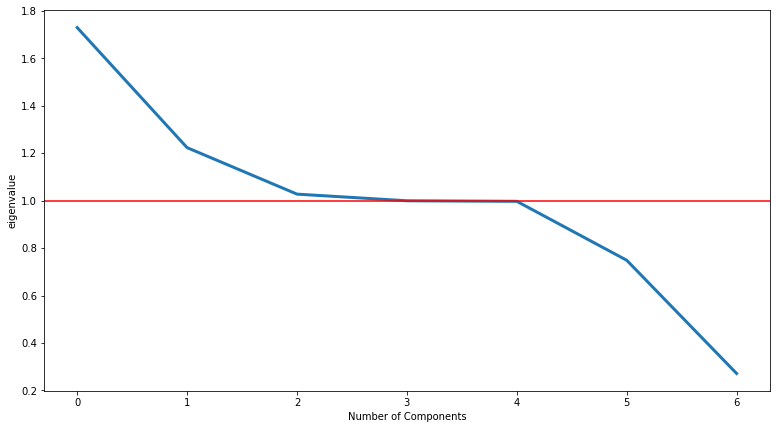

In [88]:
cov_matrix = np.dot(normalized_df.T, normalized_df)/cont_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

plt.figure(figsize=(13,7))
plt.plot(eigenvalues, linewidth=3)
plt.axhline(y=1, color='r', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('eigenvalue')
plt.show()

In [89]:
num = 1
for i in eigenvalues:
    print('PCA',num, ' ', i)
    num+=1

PCA 1   1.7300451174394984
PCA 2   1.223758382181254
PCA 3   1.02779395625374
PCA 4   0.9997808018689972
PCA 5   0.9974818314697579
PCA 6   0.7489821564426503
PCA 7   0.2714577543440613


# E2.  Justify reduced number of the principal components

We can see from above that PCA 1, 2 and 3 have eigenvalues above 1. For PCA 4, 5, 6, and 7, they fall below 1 and thus will be discarded.

# E3. Describe how the organization would benefit from the use of PCA.
Many things come to mind when referring to the benefits of using PCA. For one, it helps remove multicollinearty and thus reduce the dimensions which can be beneficial in reducing computational costs, or even with machine learning, it can helps in a situation where a model is overfit and thus improve performance. Specifically, the benefit is helping to "find the most significant features" in a dataset which can ultimately reduce redundant features or "help find patterns in high-dimensional datasets (Simplilearn 2023).

# G. Web Sources (Code)
- https://seaborn.pydata.org/generated/seaborn.histplot.html
- https://seaborn.pydata.org/generated/seaborn.boxplot.html

# H. Resources
- https://towardsdatascience.com/a-step-by-step-introduction-to-pca-c0d78e26a0dd
- https://www.simplilearn.com/tutorials/machine-learning-tutorial/principal-component-analysis